In [2]:
conda install -c conda-forge imbalanced-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score,average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

In [4]:
#Import dataset
AccidentData = pd.read_csv("Data1.csv",delimiter=",",low_memory=False)

In [5]:
len(AccidentData.index)

194673

In [6]:
len(AccidentData.columns)

38

In [7]:
AccidentData["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [8]:
AccidentData.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [9]:
#Create new dataset without the non-relevant columns
AccidentEditData = AccidentData

In [10]:
len(AccidentEditData.index)

194673

In [11]:
len(AccidentEditData.columns)

38

In [12]:
#Exclude non-relevant columns
AccidentEditData.drop(['X', 'Y','COLDETKEY', 'INCKEY','REPORTNO','STATUS','ADDRTYPE','INTKEY','LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC','COLLISIONTYPE',
'PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SDOT_COLCODE','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR'],axis = 1, inplace = True)

In [13]:
AccidentEditData.head()

,SEVERITYCODE,OBJECTID,SEVERITYCODE.1,SEVERITYDESC,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND
0,2,1,2,Injury Collision,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Wet,Daylight
1,1,2,1,Property Damage Only Collision,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Wet,Dark - Street Lights On
2,1,3,1,Property Damage Only Collision,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Dry,Daylight
3,1,4,1,Property Damage Only Collision,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight
4,2,5,2,Injury Collision,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Wet,Daylight


In [14]:
AccidentEditData.drop(['SEVERITYCODE.1','SDOT_COLDESC','INCDATE','INCDTTM'],axis=1,inplace=True)

In [15]:
AccidentEditData.head()

,SEVERITYCODE,OBJECTID,SEVERITYDESC,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,1,Injury Collision,At Intersection (intersection related),Overcast,Wet,Daylight
1,1,2,Property Damage Only Collision,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
2,1,3,Property Damage Only Collision,Mid-Block (not related to intersection),Overcast,Dry,Daylight
3,1,4,Property Damage Only Collision,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,2,5,Injury Collision,At Intersection (intersection related),Raining,Wet,Daylight


In [16]:
#Basic Statistics
basicstats=AccidentEditData.describe(include="all")
basicstatsplt=basicstats[["SEVERITYCODE","WEATHER","ROADCOND","LIGHTCOND"]]
basicstatsplt.drop(['unique','freq','mean','std','min','25%','50%','75%','max','top'],axis=0,inplace=True)
basicstatsplt=basicstatsplt.transpose()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


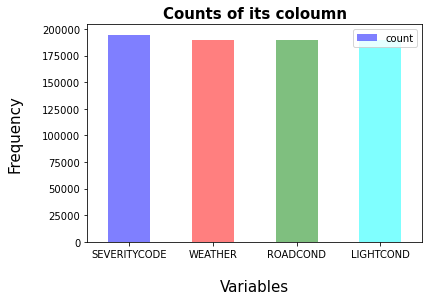

In [17]:
colors=['blue','red','green','cyan']
basicstatsplt.plot(kind='bar',alpha=0.50,color=[colors])
plt.title('Counts of its coloumn', fontsize=15, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=360)
plt.show()

Text(0.5, 1.02, 'Type of Accidents, Seatle')

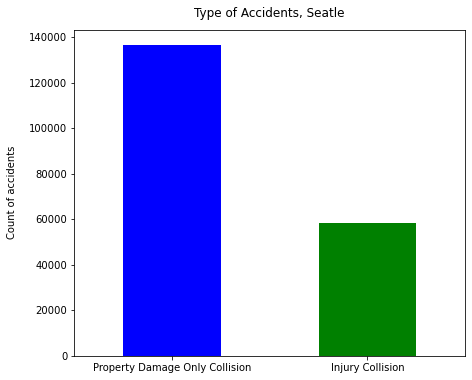

In [18]:
#Basic Statistics
AccidentEditData['SEVERITYDESC'].value_counts().plot(kind='bar',figsize=(7,6),rot=0,color=['blue','green'])
plt.ylabel("Count of accidents",labelpad=12)
plt.title("Type of Accidents, Seatle",y=1.02)

In [19]:
#Check Weather values
W1=AccidentEditData.WEATHER
counts=W1.value_counts(dropna=False)
percent=W1.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
pd.DataFrame({'counts':counts,'percent':percent})

,counts,percent
Clear,111135,58.62%
Overcast,27714,14.62%
Raining,33145,17.48%
Unknown,15091,7.96%
NaN,5081,NaN
Snowing,907,0.48%
Other,832,0.44%
Fog/Smog/Smoke,569,0.3%
Sleet/Hail/Freezing Rain,113,0.06%
Blowing Sand/Dirt,56,0.03%


In [20]:
# Encode WEATHER attributes
AccidentEditData.WEATHER.replace(to_replace=['Clear'],value='1', inplace = True)
AccidentEditData.WEATHER.replace(to_replace=['Raining'],value='2', inplace = True)
AccidentEditData.WEATHER.replace(to_replace=['Overcast'],value='3', inplace = True)
AccidentEditData.WEATHER.replace(to_replace=['Snowing'],value='4', inplace = True)
AccidentEditData.WEATHER.replace(to_replace=['Fog/Smog/Smoke'],value='5', inplace = True)
AccidentEditData.WEATHER.replace(to_replace=['Sleet/Hail/Freezing Rain'],value='6', inplace = True)
AccidentEditData.WEATHER.replace(to_replace=['Blowing Sand/Dirt'],value='7', inplace = True)
AccidentEditData.WEATHER.replace(to_replace=['Severe Crosswind'],value='8', inplace = True)
AccidentEditData.WEATHER.replace(to_replace=['Partly Cloudy'],value='9', inplace = True)
AccidentEditData.WEATHER.replace(to_replace=['Unknown','Other'],value='10', inplace = True)

In [21]:
AccidentEditData["WEATHER"].value_counts()

1     111135
2      33145
3      27714
10     15923
4        907
5        569
6        113
7         56
8         25
9          5
Name: WEATHER, dtype: int64

In [22]:
#Check ROADCOND values
R1=AccidentEditData.ROADCOND
counts=R1.value_counts(dropna=False)
percent=R1.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
pd.DataFrame({'counts':counts,'percent':percent})

,counts,percent
Dry,124510,65.65%
Unknown,15078,7.95%
Wet,47474,25.03%
NaN,5012,NaN
Ice,1209,0.64%
Snow/Slush,1004,0.53%
Other,132,0.07%
Standing Water,115,0.06%
Sand/Mud/Dirt,75,0.04%
Oil,64,0.03%


In [23]:
# Encode ROADCOND attributes
AccidentEditData.ROADCOND.replace(to_replace=['Dry'],value='1', inplace = True)
AccidentEditData.ROADCOND.replace(to_replace=['Wet'],value='2', inplace = True)
AccidentEditData.ROADCOND.replace(to_replace=['Ice'],value='3', inplace = True)
AccidentEditData.ROADCOND.replace(to_replace=['Snow/Slush'],value='4', inplace = True)
AccidentEditData.ROADCOND.replace(to_replace=['Standing Water'],value='5', inplace = True)
AccidentEditData.ROADCOND.replace(to_replace=['Sand/Mud/Dirt'],value='6', inplace = True)
AccidentEditData.ROADCOND.replace(to_replace=['Oil'],value='7', inplace = True)
AccidentEditData.ROADCOND.replace(to_replace=['Unknown','Other'],value='8', inplace = True)


In [24]:
AccidentEditData["ROADCOND"].value_counts()

1    124510
2     47474
8     15210
3      1209
4      1004
5       115
6        75
7        64
Name: ROADCOND, dtype: int64

In [25]:
#Check LIGHTCOND values
L1=AccidentEditData.LIGHTCOND
counts=L1.value_counts(dropna=False)
percent=L1.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
pd.DataFrame({'counts':counts,'percent':percent})

,counts,percent
Dark - Street Lights On,48507,25.6%
Daylight,116137,61.29%
Dusk,5902,3.11%
Unknown,13473,7.11%
NaN,5170,NaN
Dawn,2502,1.32%
Dark - No Street Lights,1537,0.81%
Dark - Street Lights Off,1199,0.63%
Other,235,0.12%
Dark - Unknown Lighting,11,0.01%


In [26]:
# Encode LIGHTCOND attributes
AccidentEditData.LIGHTCOND.replace(to_replace=['Daylight'],value='1', inplace = True)
AccidentEditData.LIGHTCOND.replace(to_replace=['Dark - Street Lights On'],value='2', inplace = True)
AccidentEditData.LIGHTCOND.replace(to_replace=['Dusk'],value='3', inplace = True)
AccidentEditData.LIGHTCOND.replace(to_replace=['Dawn'],value='4', inplace = True)
AccidentEditData.LIGHTCOND.replace(to_replace=['Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting'],value='5', inplace = True)
AccidentEditData.LIGHTCOND.replace(to_replace=['Unknown','Other'],value='6', inplace = True)

In [27]:
AccidentEditData["LIGHTCOND"].value_counts()

1    116137
2     48507
6     13708
3      5902
5      2747
4      2502
Name: LIGHTCOND, dtype: int64

In [28]:
#Drop rows where WEATHER, ROADCOND AND LIGHTCONT have missing data.

AccidentEditData.dropna(subset=['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis=0, inplace = True)


In [29]:
len(AccidentEditData.index)

189337

In [30]:
# Reset index
AccidentEditData.reset_index(drop=True, inplace=True)

In [32]:
AccidentEditData["JUNCTIONTYPE"].value_counts(dropna=False)

Mid-Block (not related to intersection)              86856
At Intersection (intersection related)               61241
Mid-Block (but intersection related)                 22353
Driveway Junction                                    10520
NaN                                                   6141
At Intersection (but not related to intersection)     2057
Ramp Junction                                          162
Unknown                                                  7
Name: JUNCTIONTYPE, dtype: int64

In [33]:
# Replace missing values in JUNTIONTYPE column with 'Unknown'
AccidentEditData["JUNCTIONTYPE"].replace(np.nan, "Unknown", inplace=True)

In [34]:
AccidentEditData["JUNCTIONTYPE"].value_counts(dropna=False)

Mid-Block (not related to intersection)              86856
At Intersection (intersection related)               61241
Mid-Block (but intersection related)                 22353
Driveway Junction                                    10520
Unknown                                               6148
At Intersection (but not related to intersection)     2057
Ramp Junction                                          162
Name: JUNCTIONTYPE, dtype: int64

In [35]:
AccidentEditData.head()

,SEVERITYCODE,OBJECTID,SEVERITYDESC,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,1,Injury Collision,At Intersection (intersection related),3,2,1
1,1,2,Property Damage Only Collision,Mid-Block (not related to intersection),2,2,2
2,1,3,Property Damage Only Collision,Mid-Block (not related to intersection),3,1,1
3,1,4,Property Damage Only Collision,Mid-Block (not related to intersection),1,1,1
4,2,5,Injury Collision,At Intersection (intersection related),2,2,1


In [36]:
len(AccidentEditData.index)

189337

In [37]:
len(AccidentEditData.columns)

7

In [41]:
#ML Feature Sets
X=AccidentEditData[["ROADCOND","WEATHER","LIGHTCOND"]].values
y=AccidentEditData["SEVERITYCODE"].values

In [42]:
#Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (151469, 3) (151469,)
Test set: (37868, 3) (37868,)


In [43]:
#Decision Tree Clasifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DT.fit(X,y)

        #Make Prediction:
yhatDT = DT.predict(X_test)

        #Check Accuracy
print('Accuracy score for Decision Tree = ', accuracy_score(yhatDT, y_test))
print('F1 score for Decision Tree = ', f1_score(y_test, yhatDT, average='weighted'))
print('Jaccard Index for Decision Tree = ', jaccard_score(y_test, yhatDT))
print('Precision/Recall for Decision Tree = ',average_precision_score(y_test, yhatDT))
#print('LogLoss score for Decision Tree = ', accuracy_score(yhatDT, y_test))

Accuracy score for Decision Tree =  0.6961814724833633
F1 score for Decision Tree =  0.5715093121113258
Jaccard Index for Decision Tree =  0.696173449177384
Precision/Recall for Decision Tree =  0.6961550649625013


In [52]:
#Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR
yhat = LR.predict(X_test)
yhat
yhat_prob = LR.predict_proba(X_test)
yhat_prob
print('LogLoss =',log_loss(y_test, yhat_prob))
print('Accuracy= ', accuracy_score(y_test, yhat))
print('F1 score= ', f1_score(y_test, yhat, average='weighted'))
print('Jaccard Index  = ', jaccard_score(y_test, yhat))
print('Rrecision/recall =',average_precision_score(y_test, yhat))
        

LogLoss = 0.5954579863178768
Accuracy=  0.6961550649625013
F1 score=  0.5714476046252985
Jaccard Index  =  0.6961550649625013
Rrecision/recall = 0.6961550649625013


In [53]:
# k-Nearest Neighbour
y = AccidentEditData['SEVERITYCODE'].values
y[1:2]
# Normalisation
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
# Train / test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (151469, 3) (151469,)
Test set: (37868, 3) (37868,)


In [54]:
# Train the dataset with the train set
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh


KNeighborsClassifier(n_neighbors=4)

In [55]:
# Use the model to predict the test set
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1])

In [56]:
# Measure accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.6992387881348658
Test set Accuracy:  0.6960230273581917


In [58]:
# Calculate accuracy with different k values
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc


array([0.58632619, 0.64146509, 0.61606105, 0.69602303, 0.61975811,
       0.6418612 , 0.63877152, 0.69301257, 0.69253723])

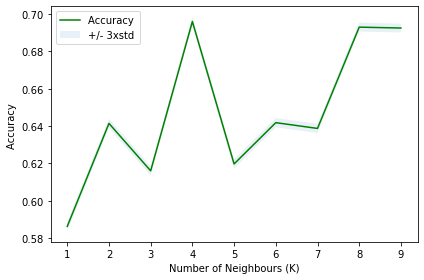

In [59]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()


In [60]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
print('F1 score= ', f1_score(y_test, yhat, average='weighted'))
print('Jaccard Index  = ', jaccard_score(y_test, yhat))
print('Rrecision/recall =',average_precision_score(y_test, yhat))

The best accuracy was with 0.6960230273581917 with k= 4
F1 score=  0.5747532549555798
Jaccard Index  =  0.6916660046079288
Rrecision/recall = 0.6961458243042578
